In [174]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [172]:
nfip_claims_new =pd.read_csv('/Users/yaseminerguezel/neuefische/florita/data/nfip_claims_eda.csv')

In [175]:
nfip_claims_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337885 entries, 0 to 2337884
Data columns (total 43 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   Unnamed: 0                                  int64  
 1   agricultureStructureIndicator               float64
 2   baseFloodElevation                          int64  
 3   basementEnclosureCrawlspace                 int64  
 4   reportedCity                                object 
 5   condominiumIndicator                        object 
 6   policyCount                                 int64  
 7   countyCode                                  int64  
 8   communityRatingSystemDiscount               int64  
 9   dateOfLoss                                  object 
 10  elevatedBuildingIndicator                   int64  
 11  elevationCertificateIndicator               int64  
 12  floodZone                                   object 
 13  houseWorship               

In [111]:
print(nfip_claims_new.isnull().sum())

Unnamed: 0                                    0
agricultureStructureIndicator                 0
baseFloodElevation                            0
basementEnclosureCrawlspace                   0
reportedCity                                  0
condominiumIndicator                          0
policyCount                                   0
countyCode                                    0
communityRatingSystemDiscount                 0
dateOfLoss                                    0
elevatedBuildingIndicator                     0
elevationCertificateIndicator                 0
floodZone                                     0
houseWorship                                  0
latitude                                      0
longitude                                     0
locationOfContents                            0
lowestFloorElevation                          0
numberOfFloorsInTheInsuredBuilding            0
nonProfitIndicator                            0
obstructionType                         

In [112]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [176]:
nfip_claims_new = nfip_claims_new.drop('Unnamed: 0', axis=1)

In [177]:
nfip_claims_new["agricultureStructureIndicator"]= nfip_claims_new.agricultureStructureIndicator.astype(int)

In [115]:
# Select numeric columns
nfip_claims_new.select_dtypes('number')

,agricultureStructureIndicator,baseFloodElevation,basementEnclosureCrawlspace,policyCount,countyCode,communityRatingSystemDiscount,elevatedBuildingIndicator,elevationCertificateIndicator,houseWorship,latitude,longitude,locationOfContents,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,totalinsurancecoverage,amountPaidonTotalClaim,new_elev_diff,MonthOfLosss,BuildingsConstructionYear,LossRatio
0,0,0,1,1,24033,5,0,0,0,38,-77,0,0,3,0,999,1,0,0,0,0.0,0.0,100000,40000,2007,20745,1.0,140000,0,0,1,1953,0.000000
1,0,0,0,1,30009,6,1,0,0,45,-109,0,0,2,0,50,1,593,0,0,0.0,0.0,150000,0,2011,59068,1.0,150000,593,0,7,1975,0.003953
2,0,50,0,1,48201,5,0,3,0,29,-95,0,50,2,0,10,1,0,0,0,1.0,0.0,25000,25000,2001,77025,1.0,50000,0,0,6,1983,0.000000
3,0,9,0,1,12103,5,1,0,0,27,-82,0,8,2,0,10,1,0,0,0,0.0,0.0,150000,35000,1996,33702,1.0,185000,0,-1,10,1969,0.000000
4,0,0,0,1,24029,6,1,0,0,39,-76,0,0,2,0,10,1,31311,4329,0,0.0,0.0,75000,10000,2003,21620,0.0,85000,35640,0,9,1980,0.419294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337880,0,8,0,1,37055,6,1,0,0,35,-75,4,10,3,0,10,1,15927,0,0,1.0,0.0,250000,70400,2021,27968,0.0,320400,15927,2,11,2002,0.049710
2337881,0,0,2,1,26111,5,0,0,0,43,-84,0,0,3,0,999,1,14005,0,0,0.0,0.0,158000,0,2017,48640,1.0,158000,14005,0,6,1980,0.088639
2337882,0,0,0,1,37191,8,0,0,0,35,-78,4,0,2,0,999,11,37731,3373,0,0.0,0.0,177800,31500,2018,27530,1.0,209300,41104,0,9,1961,0.196388
2337883,0,14,2,1,37141,7,1,0,0,34,-77,7,21,1,0,20,11,0,0,0,1.0,0.0,250000,100000,2018,28445,0.0,350000,0,7,9,2005,0.000000


### Total Insurance Coverage vs Total Claims

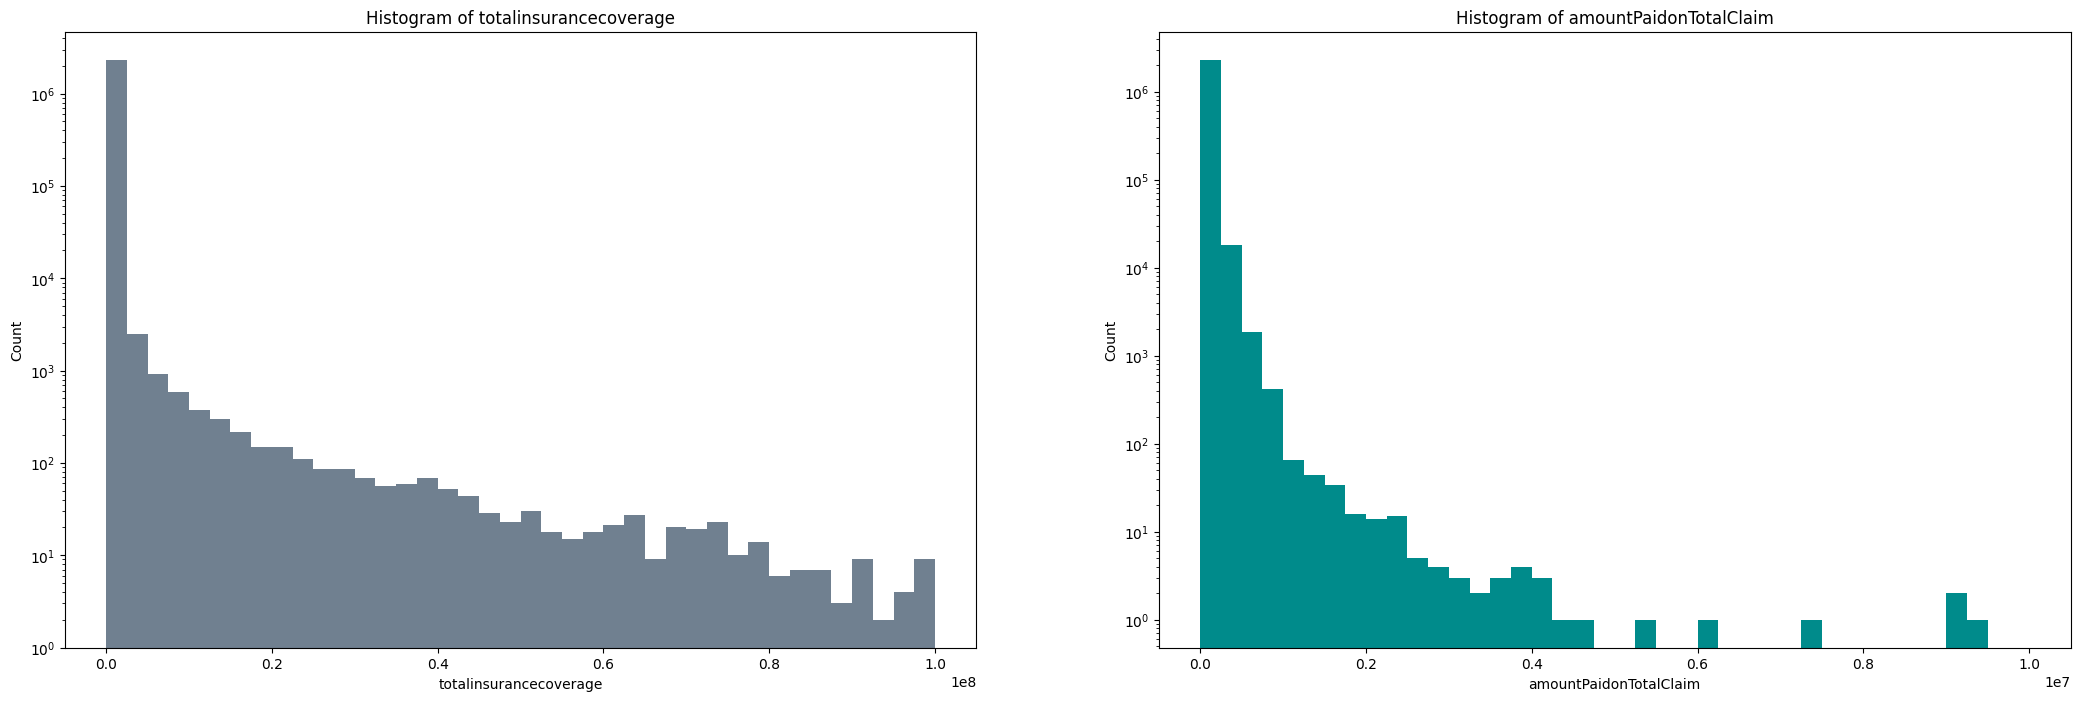

In [116]:
plt.figure(figsize=(40,8))
plt_col = ["totalinsurancecoverage","amountPaidonTotalClaim"]
plt_range = [(0,100000000),(0,10000000)]
plt_clr = ['slategray','darkcyan']
cnt = 0
for col in plt_col:
  cnt +=1
  plt.subplot(1, 3, cnt)
  plt.hist(nfip_claims_new[col],bins=40,range=plt_range[cnt-1], color=plt_clr[cnt-1], log = True)
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.title("Histogram of "+col)
plt.show()

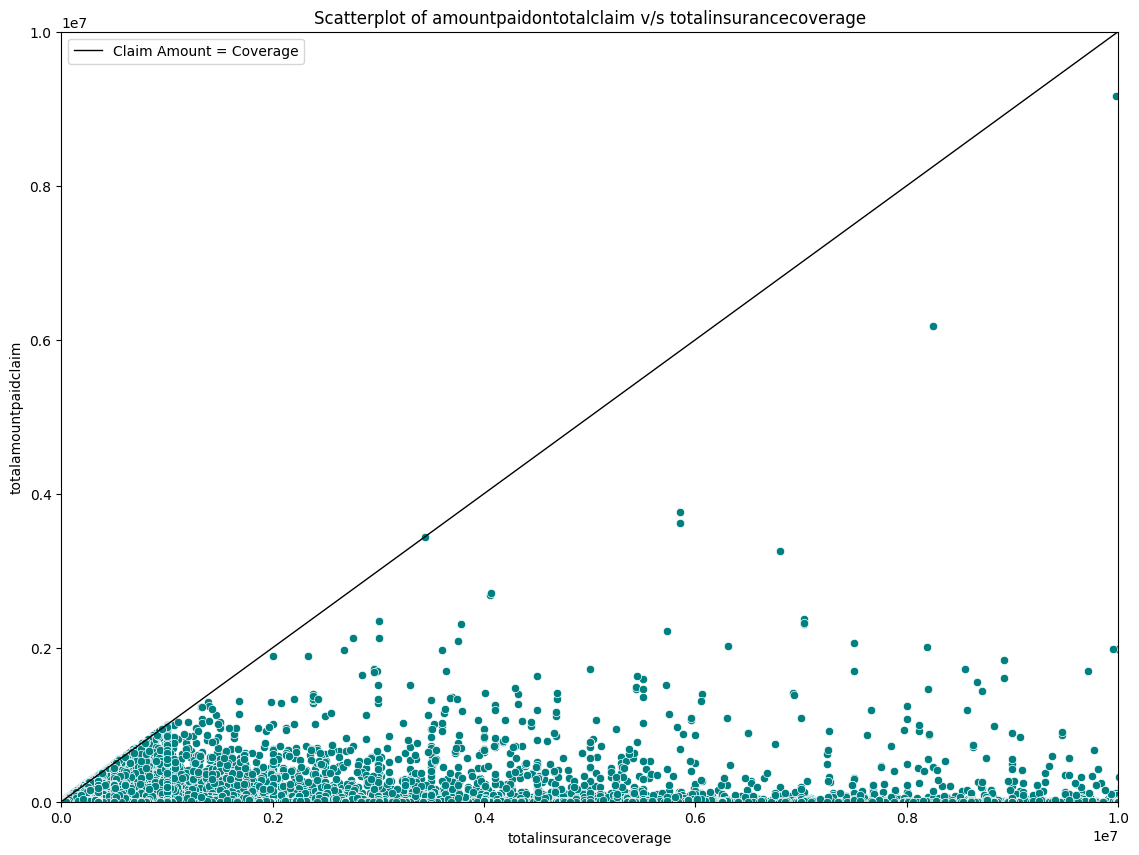

In [117]:
plt.figure(figsize = (30,10))
plt.subplot(1, 2, 1)
sns.scatterplot(x="totalinsurancecoverage", y="amountPaidonTotalClaim", data=nfip_claims_new,color = 'teal')
plt.plot([0, 10000000], [0, 10000000], color='k', linestyle='-', linewidth=1, label = 'Claim Amount = Coverage')
plt.xlabel('totalinsurancecoverage')
plt.ylabel("totalamountpaidclaim")
plt.ylim(0, 10000000)
plt.xlim(0, 10000000)
plt.title("Scatterplot of amountpaidontotalclaim v/s totalinsurancecoverage")
plt.legend()


### Number of Total Claims by State 

In [118]:
claim_total =nfip_claims_new.groupby(['state'])['id'].count().rename("TotalClaimbyState")
claim_total= claim_total.to_frame().reset_index()
claim_total.head(5)

,state,TotalClaimbyState
0,AK,651
1,AL,42760
2,AR,8854
3,AS,17
4,AZ,4912


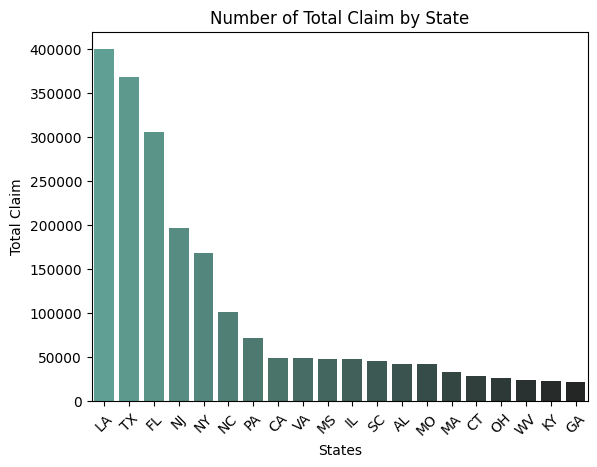

In [119]:
claim_total= claim_total.sort_values(['TotalClaimbyState'],ascending=False).head(20)

sns.barplot(x='state', y='TotalClaimbyState', data=claim_total,palette ="dark:#5A9_r")

plt.xticks(rotation=45)
plt.ylabel("Total Claim")
plt.xlabel("States")
plt.title("Number of Total Claim by State")
plt.show()

### Average Total Claim in dollar by State

In [120]:
av_claim_total =nfip_claims_new.groupby(['state'])['amountPaidonTotalClaim'].sum().rename("AmountPaidClaimbyState")
av_claim_total= av_claim_total.to_frame().reset_index()

av_claim_total.head(5)

,state,AmountPaidClaimbyState
0,AK,9345814
1,AL,1033763466
2,AR,162576559
3,AS,12023
4,AZ,51420752


In [121]:
new_data= av_claim_total.merge(claim_total, how='right', on='state')
new_data.head(5)


,state,AmountPaidClaimbyState,TotalClaimbyState
0,LA,11782627360,399377
1,TX,14654284900,368083
2,FL,5409833837,305376
3,NJ,5823401752,196899
4,NY,5019440379,168204


In [122]:
new_data.eval('averageClaimbyState =AmountPaidClaimbyState /TotalClaimbyState',inplace = True)

In [123]:
new_data.head(5)

,state,AmountPaidClaimbyState,TotalClaimbyState,averageClaimbyState
0,LA,11782627360,399377,29502.518573
1,TX,14654284900,368083,39812.446921
2,FL,5409833837,305376,17715.320906
3,NJ,5823401752,196899,29575.578098
4,NY,5019440379,168204,29841.385336


In [124]:
mean_total_claim = nfip_claims_new['amountPaidonTotalClaim'].mean()

In [125]:
mean_total_claim

24298.529535456193

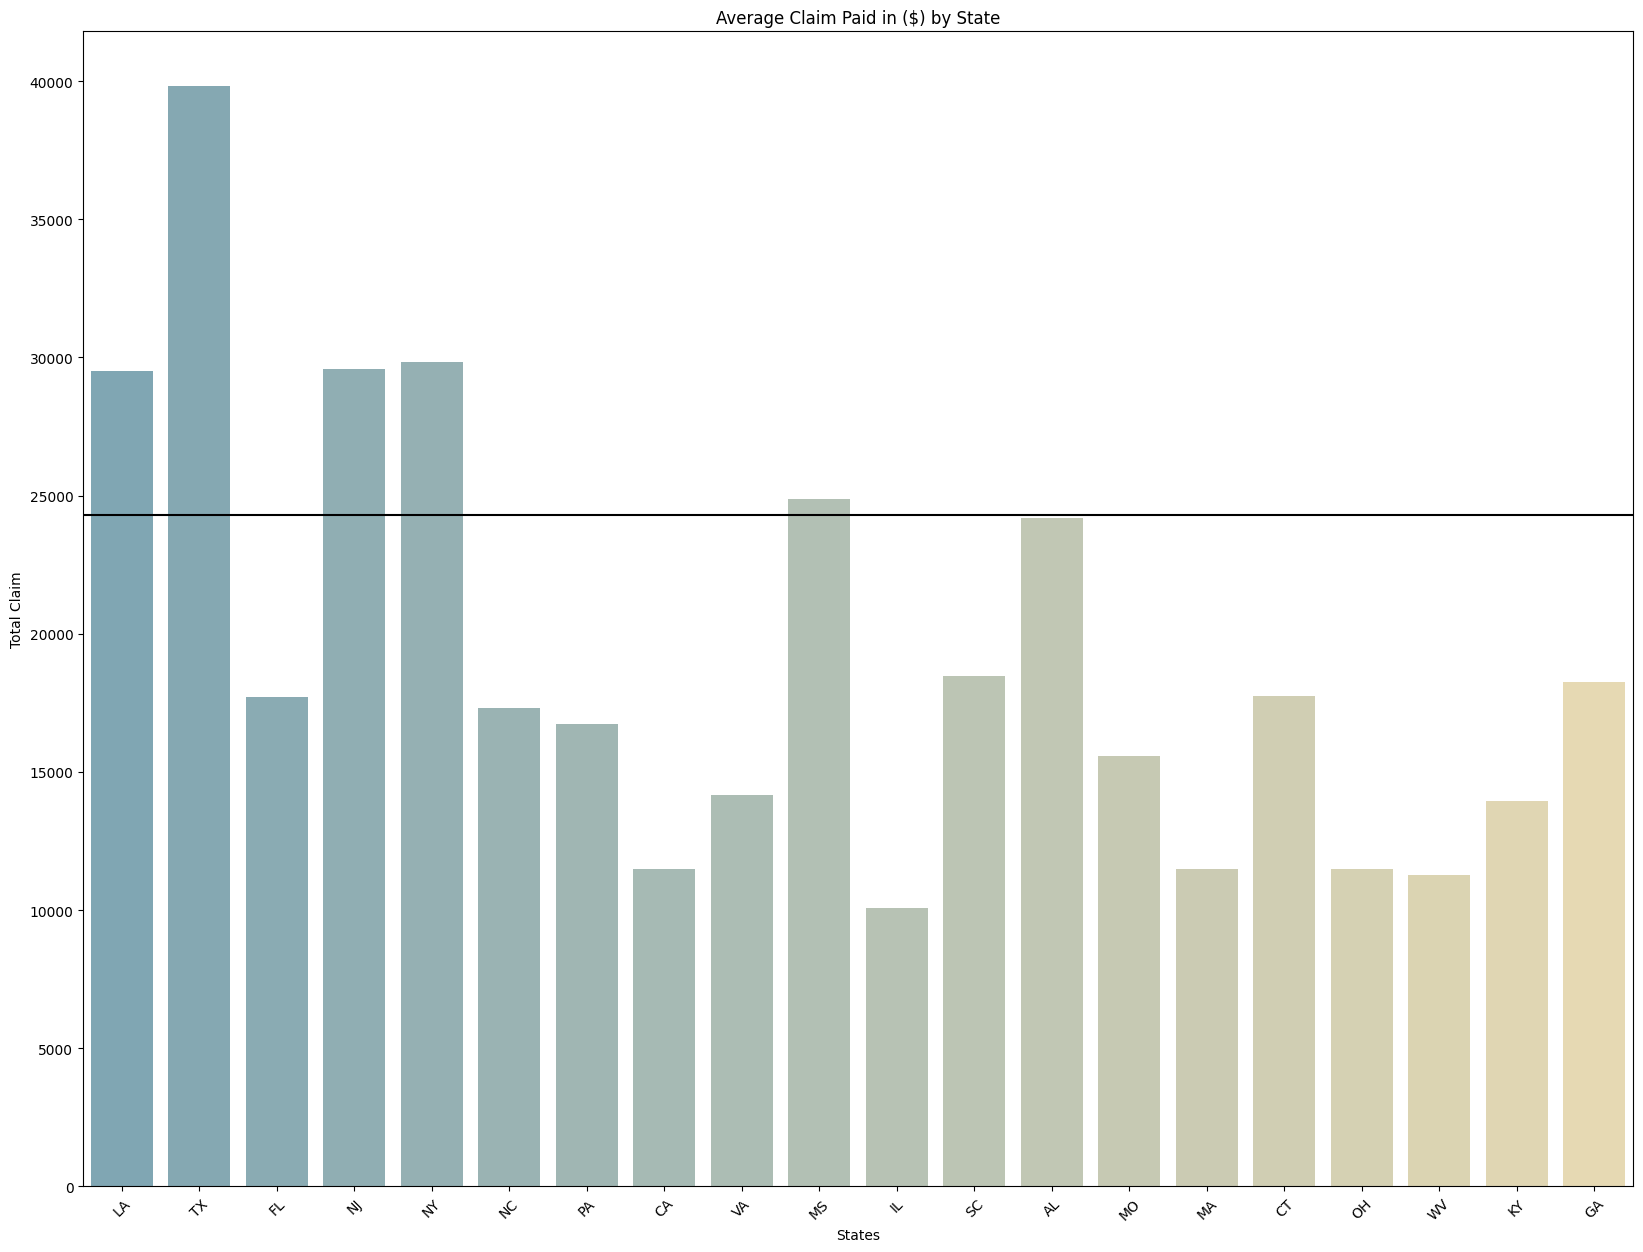

In [127]:
claim_total= new_data.sort_values(['averageClaimbyState'],ascending=False).head(10)
plt.figure(figsize=(20,15))
sns.barplot(x='state', y='averageClaimbyState', data=new_data,palette ="blend:#7AB,#EDA")

plt.xticks(rotation=45)
plt.ylabel("Total Claim")
plt.xlabel("States")
plt.title("Average Claim Paid in ($) by State")
plt.axhline(y = 24298, color = 'black', linestyle = '-')


plt.show()

In [131]:
# create classes for the classification
claim_segmentation = []
for row in nfip_claims_new['amountPaidonTotalClaim']:
        if row == 0 :    
            claim_segmentation.append(0)
        elif row > 0:  
            claim_segmentation.append(1)
        else:      
            claim_segmentation.append('check_back')

In [132]:
nfip_claims_new['claim_segmentation'] = claim_segmentation

In [133]:
nfip_claims_new['claim_segmentation'].unique()

array([0, 1])

In [134]:
total_claims_by_year =nfip_claims_new.groupby(['yearOfLoss'])['id'].count().rename("totalClaimebyyear")
total_claims_by_year= total_claims_by_year.to_frame().reset_index()
total_claims_by_year.head(5)

,yearOfLoss,totalClaimebyyear
0,1973,5
1,1974,9
2,1975,36
3,1976,60
4,1977,5194


In [135]:
claim_total_by_year =nfip_claims_new.groupby(['yearOfLoss'])['claim_segmentation'].count().rename("TotalClaimbyyear")
claim_total_by_year= claim_total_by_year.to_frame().reset_index()
claim_total_by_year.head(5)

,yearOfLoss,TotalClaimbyyear
0,1973,5
1,1974,9
2,1975,36
3,1976,60
4,1977,5194


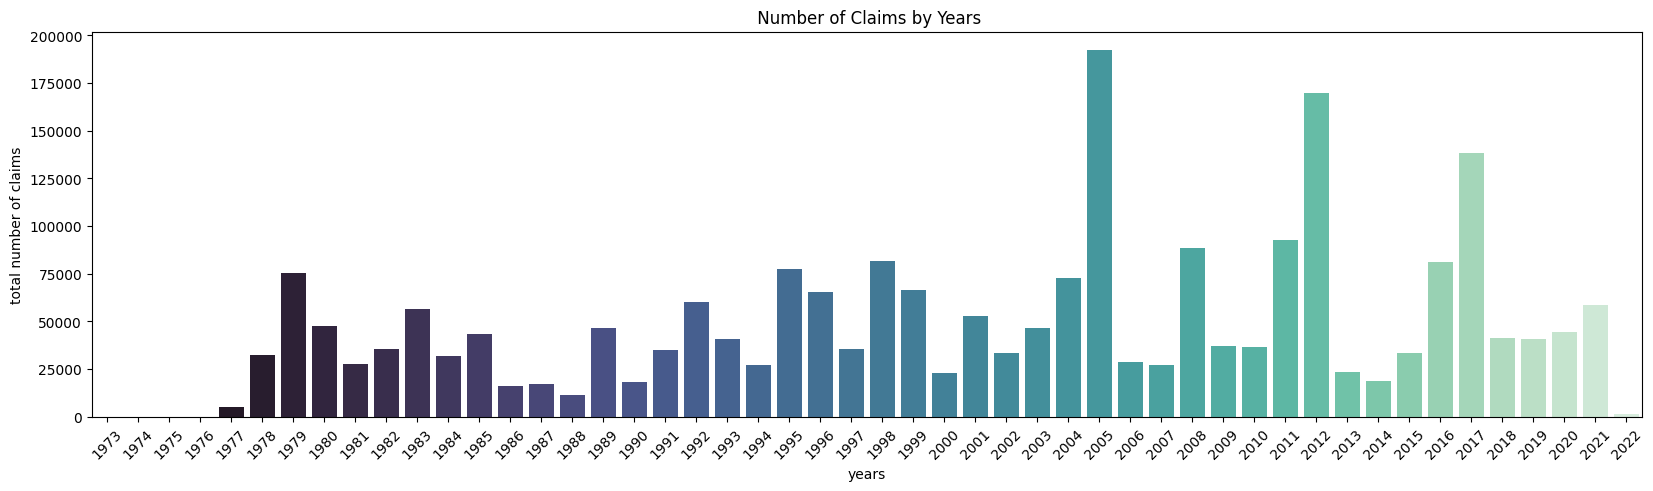

In [136]:
# change the figure size
plt.figure(figsize=(20,5))

ax = sns.barplot(x="yearOfLoss", y="TotalClaimbyyear", data=claim_total_by_year,palette = "mako")

# rotate the labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel("total number of claims")
plt.xlabel("years")
plt.title(" Number of Claims by Years")

  
plt.show()

In [137]:
average_claims_by_month =nfip_claims_new.groupby(['MonthOfLosss','claim_segmentation'])['amountPaidonTotalClaim'].count().rename("NumberofClaim")
average_claims_by_month= average_claims_by_month.to_frame().reset_index()
average_claims_by_month.head(24)

,MonthOfLosss,claim_segmentation,NumberofClaim
0,1,0,25698
1,1,1,74407
2,2,0,21222
3,2,1,49474
4,3,0,30945
5,3,1,95882
6,4,0,35849
7,4,1,142496
8,5,0,34780
9,5,1,140788


In [138]:
average_claims_by_month1 =nfip_claims_new.groupby(['MonthOfLosss'])['amountPaidonTotalClaim'].count().rename("NumberofClaim")
average_claims_by_month1= average_claims_by_month1.to_frame().reset_index()
average_claims_by_month1.head(24)

,MonthOfLosss,NumberofClaim
0,1,100105
1,2,70696
2,3,126827
3,4,178345
4,5,175568
5,6,153754
6,7,103193
7,8,466038
8,9,461431
9,10,355234


In [139]:
new_data_percentage = average_claims_by_month.merge(average_claims_by_month1, how='right', on='MonthOfLosss')
new_data_percentage.head(25)
new_data_percentage.eval('percantage_rej_app_rate = NumberofClaim_x/NumberofClaim_y',inplace = True)
new_data_percentage['percantage_rej_app_rate']=new_data_percentage['percantage_rej_app_rate'].round(2)
new_data_percentage.head(25)

,MonthOfLosss,claim_segmentation,NumberofClaim_x,NumberofClaim_y,percantage_rej_app_rate
0,1,0,25698,100105,0.26
1,1,1,74407,100105,0.74
2,2,0,21222,70696,0.30
3,2,1,49474,70696,0.70
4,3,0,30945,126827,0.24
5,3,1,95882,126827,0.76
6,4,0,35849,178345,0.20
7,4,1,142496,178345,0.80
8,5,0,34780,175568,0.20
9,5,1,140788,175568,0.80


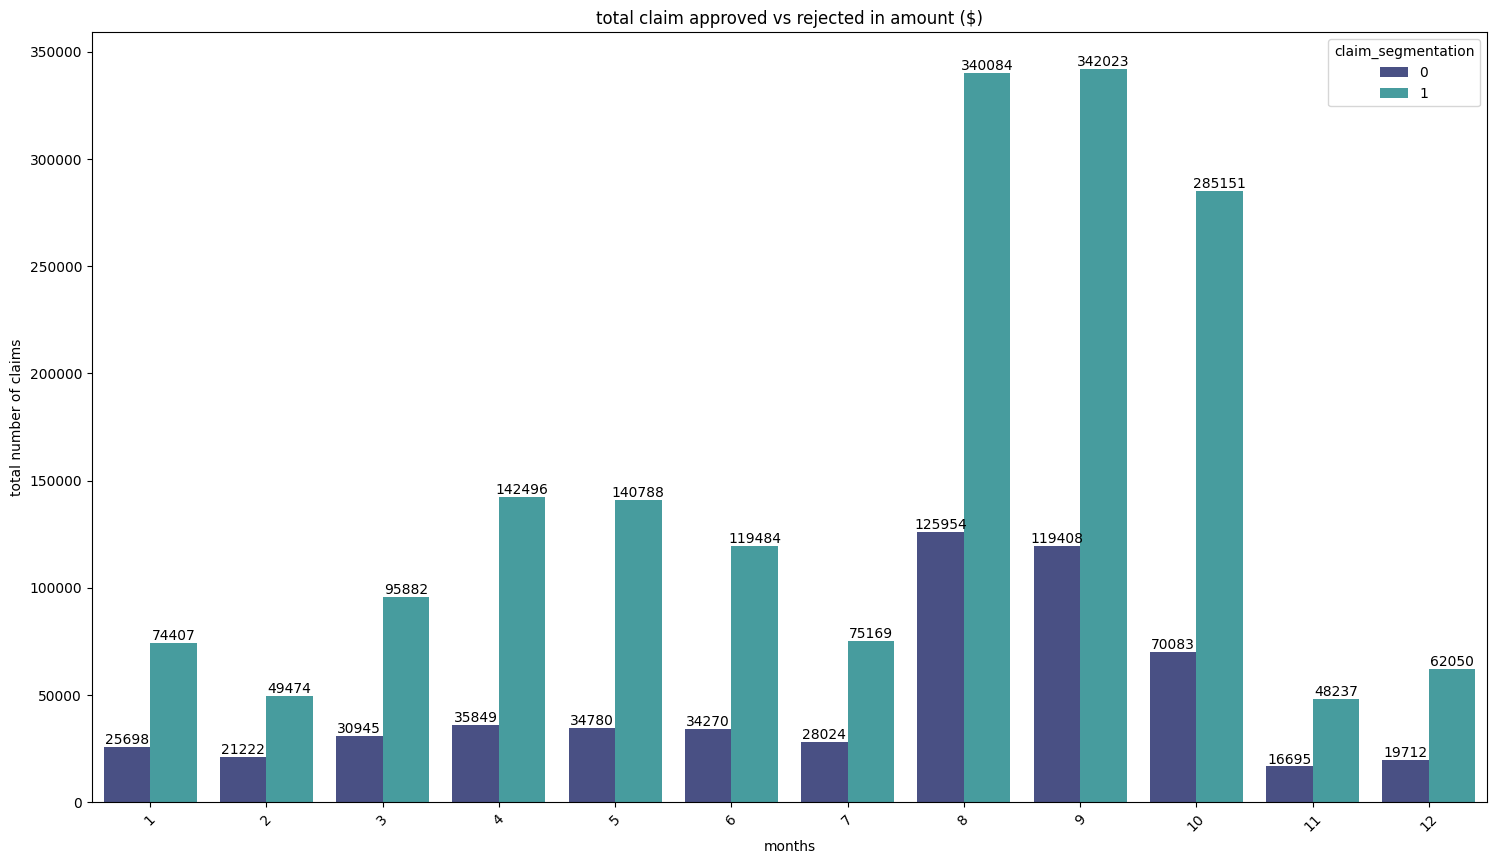

In [140]:
plt.figure(figsize=(18,10))

ax = sns.barplot(x = 'MonthOfLosss',
            y = 'NumberofClaim_x',
            hue = 'claim_segmentation',
            data =new_data_percentage,palette = "mako" )

for container in ax.containers:
    ax.bar_label(container)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel("total number of claims")
plt.xlabel("months")
plt.title("total claim approved vs rejected in amount ($)")


 
# Show the plot
plt.show()

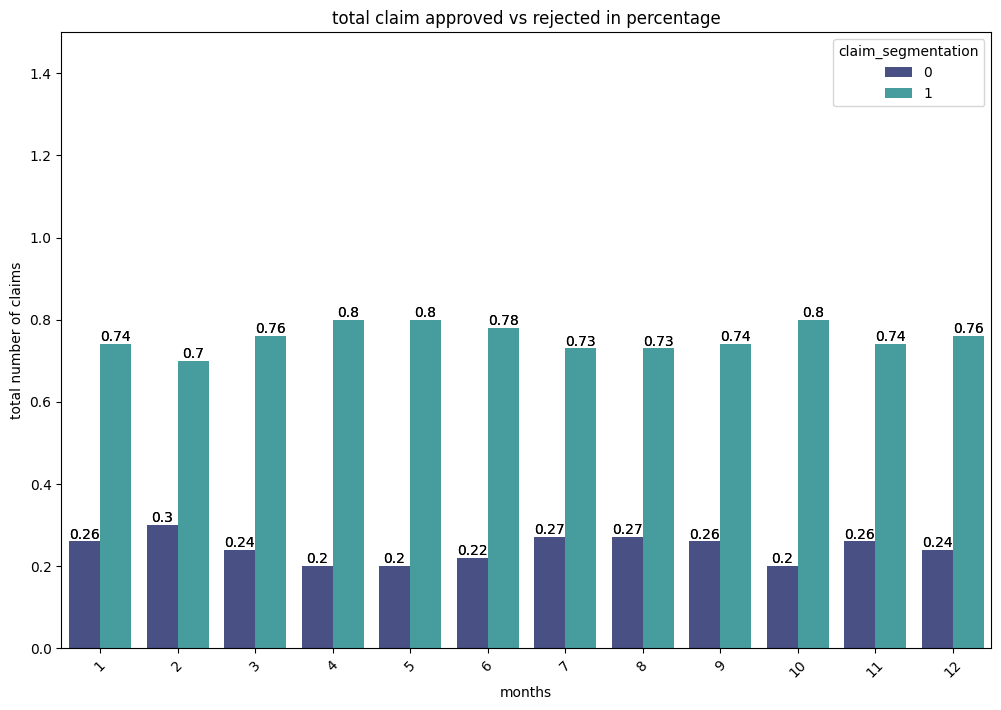

In [141]:


plt.figure(figsize=(12,8))

ax =sns.barplot(x = 'MonthOfLosss',
            y = 'percantage_rej_app_rate',
            hue = 'claim_segmentation',data =new_data_percentage,palette = "mako")
for container in ax.containers:
    ax.bar_label(container)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel("total number of claims")
plt.xlabel("months")
plt.title("total claim approved vs rejected in percentage")
plt.ylim(0,1.5)

for i in ax.containers:
     ax.bar_label(i,)

 
# Show the plot
#plt.show()

In [142]:
num_features = ['baseFloodElevation','policyCount','new_elev_diff','lowestFloorElevation','amountPaidOnBuildingClaim',
                'amountPaidOnContentsClaim','amountPaidOnIncreasedCostOfComplianceClaim','MonthOfLosss','totalBuildingInsuranceCoverage','totalContentsInsuranceCoverage']

In [143]:
corr_mtrx = nfip_claims_new[num_features].corr()

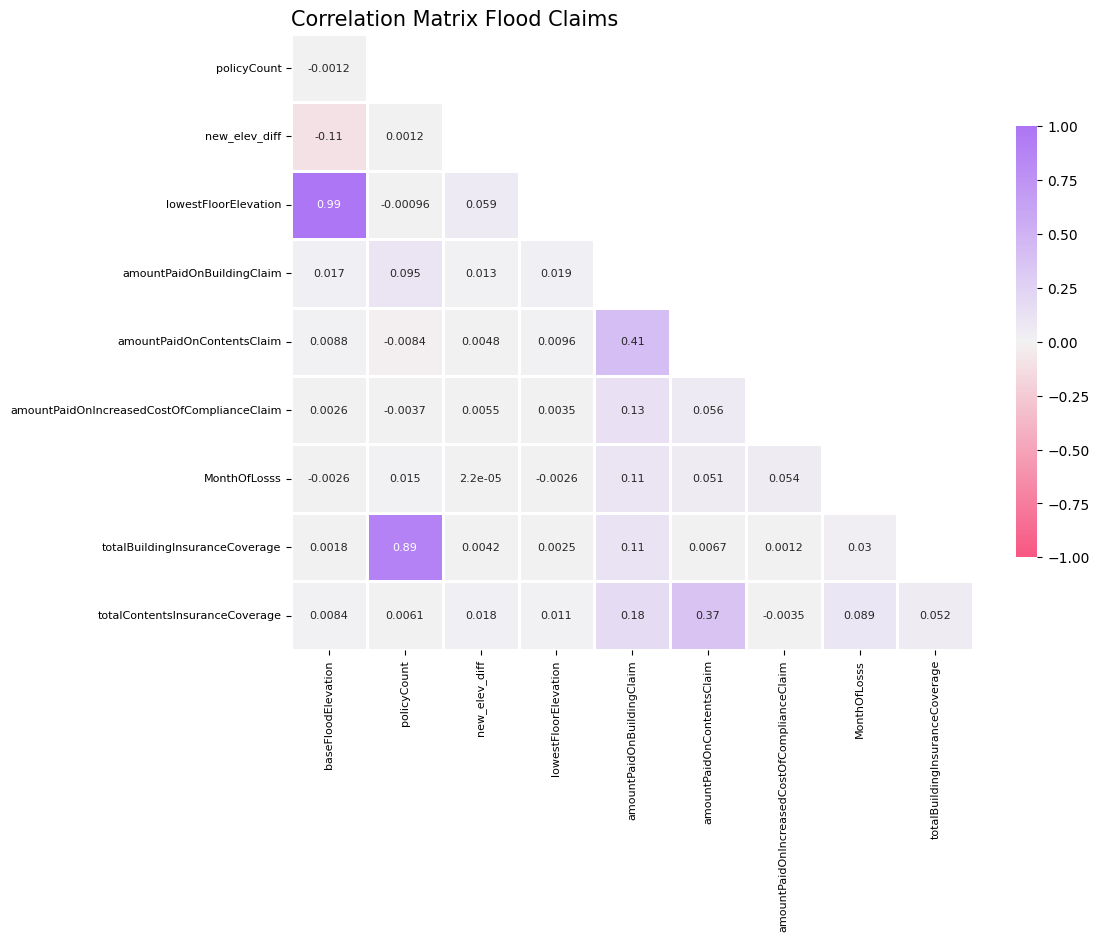

In [144]:

corr_mtrx = nfip_claims_new[num_features].corr()

mask = np.triu(corr_mtrx)
mask = mask[1:, :-1]
corr_mtrx = corr_mtrx.iloc[1:,:-1].copy()

fig, ax = plt.subplots(figsize=(11, 8))
cmap = sns.diverging_palette(0, 280, 90, 60, as_cmap=True)


ax = sns.heatmap(corr_mtrx, annot=True, mask=mask, cmap=cmap, linewidths=2, cbar_kws={"shrink": .7}, annot_kws={'size': 8}, vmin=-1, vmax=1) 

plt.tick_params(axis='both', which='major', labelsize=8)
title = 'Correlation Matrix Flood Claims'
plt.title(title, loc='left', fontsize=15)
plt.show()


### Loss Ratio = amountPaidonTotalClaim/totalinsurancecoverage

In [145]:
#nfip_claims_new.eval('LossRatio =amountPaidonTotalClaim/totalinsurancecoverage',inplace = True)

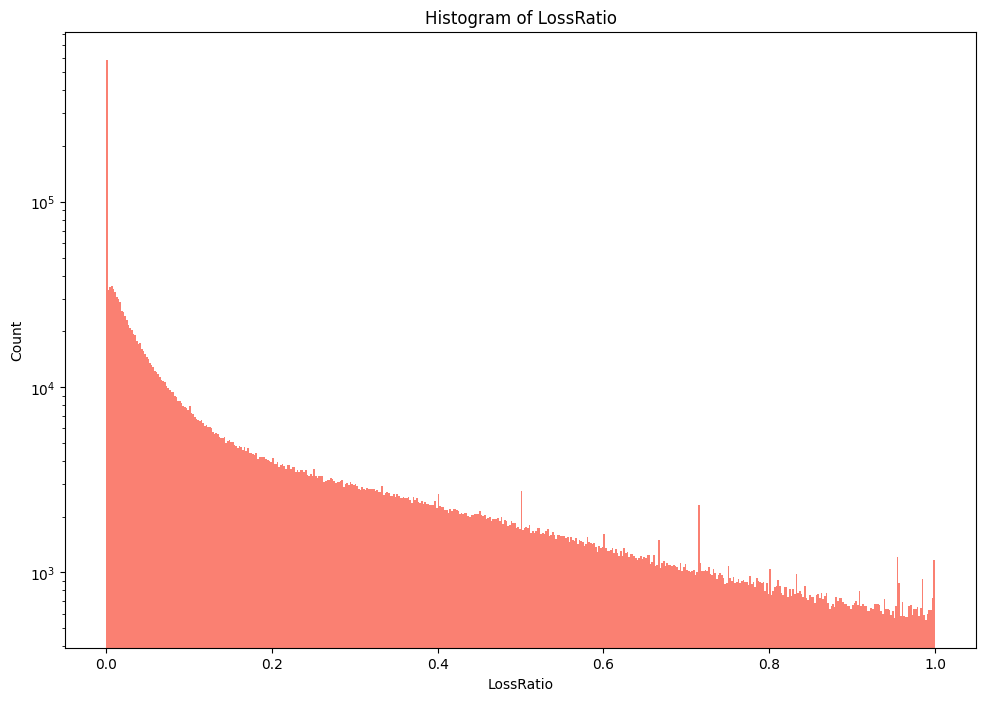

In [146]:
plt.figure(figsize=(40,8))
plt_col = ["LossRatio"]
plt_range = [(0.0,1)]
plt_clr = ['Salmon']
cnt = 0
for col in plt_col:
  cnt +=1
  plt.subplot(1, 3, cnt)
  plt.hist(nfip_claims_new[col],bins=500,range=plt_range[cnt-1], color=plt_clr[cnt-1], log = True)
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.title("Histogram of "+col)
plt.show()

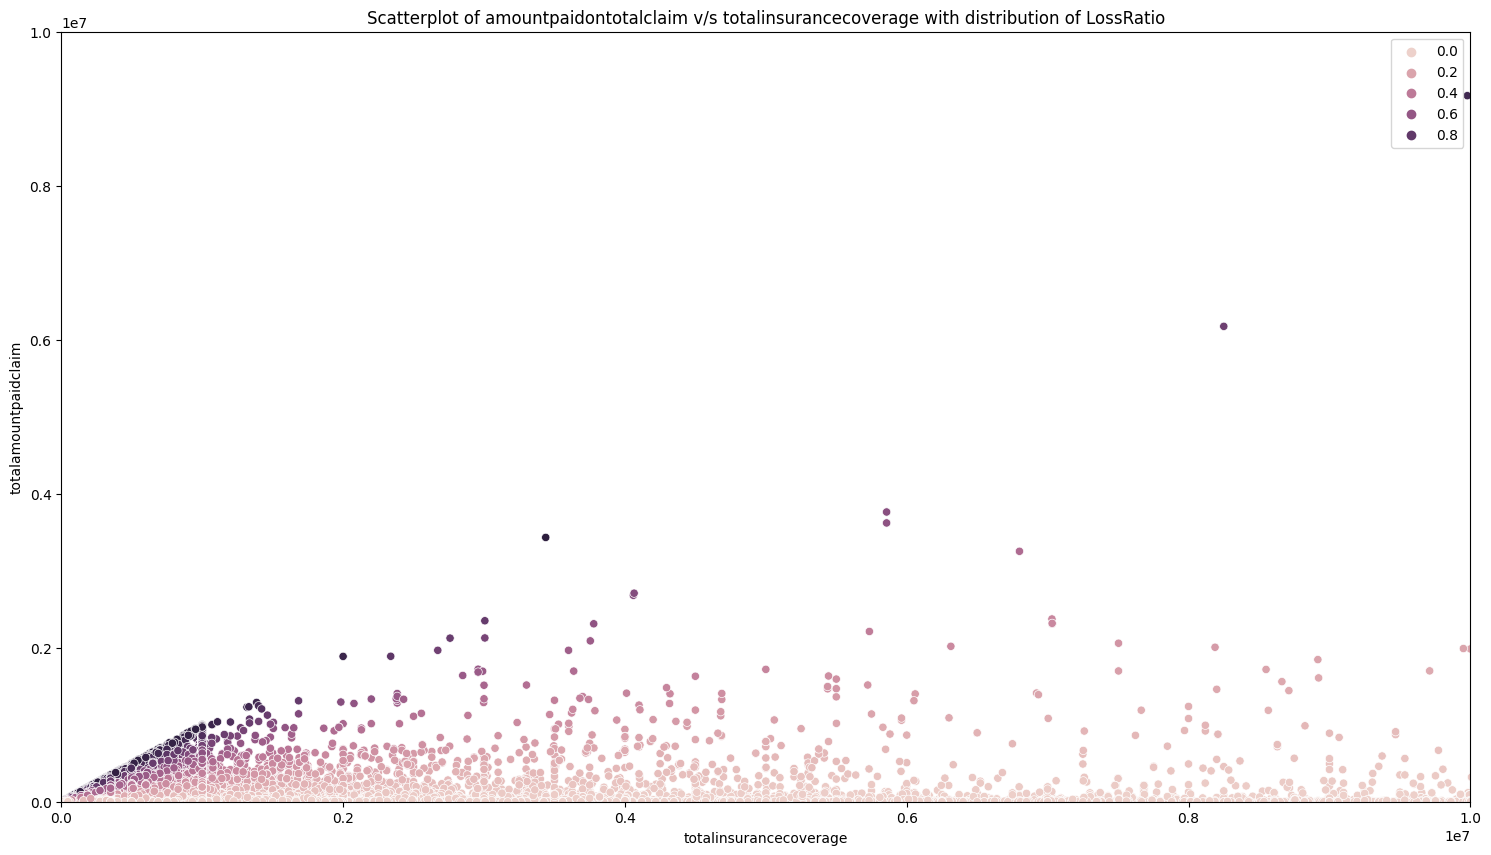

In [147]:
plt.figure(figsize = (40,10))
plt.subplot(1, 2, 1)
sns.scatterplot(x="totalinsurancecoverage", y="amountPaidonTotalClaim", data=nfip_claims_new,hue = nfip_claims_new['LossRatio'])
#plt.plot([0, 10000000], [0, 10000000], color='k', linestyle='-', linewidth=1, label = 'Claim Amount = Coverage')
plt.xlabel('totalinsurancecoverage')
plt.ylabel("totalamountpaidclaim")
plt.ylim(0, 10000000)
plt.xlim(0, 10000000)
plt.title("Scatterplot of amountpaidontotalclaim v/s totalinsurancecoverage with distribution of LossRatio")
plt.legend()


***Above graph shows that lossRatio is higher where the total insurance coverage is low. As the total insurance gets higer lossRatio is getting smaller. 

### Loss Ratio by States

In [86]:
amount_claim_states =nfip_claims_new.groupby(['state'])['amountPaidonTotalClaim'].sum().rename("totalClaim")
amount_claim_states= amount_claim_states.to_frame().reset_index()
amount_claim_states.head(5)

,state,totalClaim
0,AK,9345814
1,AL,1033763466
2,AR,162576559
3,AS,12023
4,AZ,51420752


In [87]:
amount_coverage_states =nfip_claims_new.groupby(['state'])['totalinsurancecoverage'].sum().rename("totalinsurance")
amount_coverage_states= amount_coverage_states.to_frame().reset_index()
amount_coverage_states.head(5)

,state,totalinsurance
0,AK,102658300
1,AL,12988755400
2,AR,942191200
3,AS,971600
4,AZ,641877900


In [88]:
new_data_lossRatio_state = amount_claim_states.merge(amount_coverage_states, how='right', on='state')
new_data_lossRatio_state.eval('lossRatioSate =totalClaim /totalinsurance',inplace = True)
#new_data_lossRatio_state.lossRatioSate.round(2)
#new_data_lossRatio_state.head(10)
new_data_lossRatio_state= new_data_lossRatio_state.round({'lossRatioSate': 2})
new_data_lossRatio_state.head(10)

,state,totalClaim,totalinsurance,lossRatioSate
0,AK,9345814,102658300,0.09
1,AL,1033763466,12988755400,0.08
2,AR,162576559,942191200,0.17
3,AS,12023,971600,0.01
4,AZ,51420752,641877900,0.08
5,CA,564483280,7421373700,0.08
6,CO,75121788,1139093500,0.07
7,CT,507435658,5701458900,0.09
8,DC,4229060,114121700,0.04
9,DE,77974152,1689371800,0.05


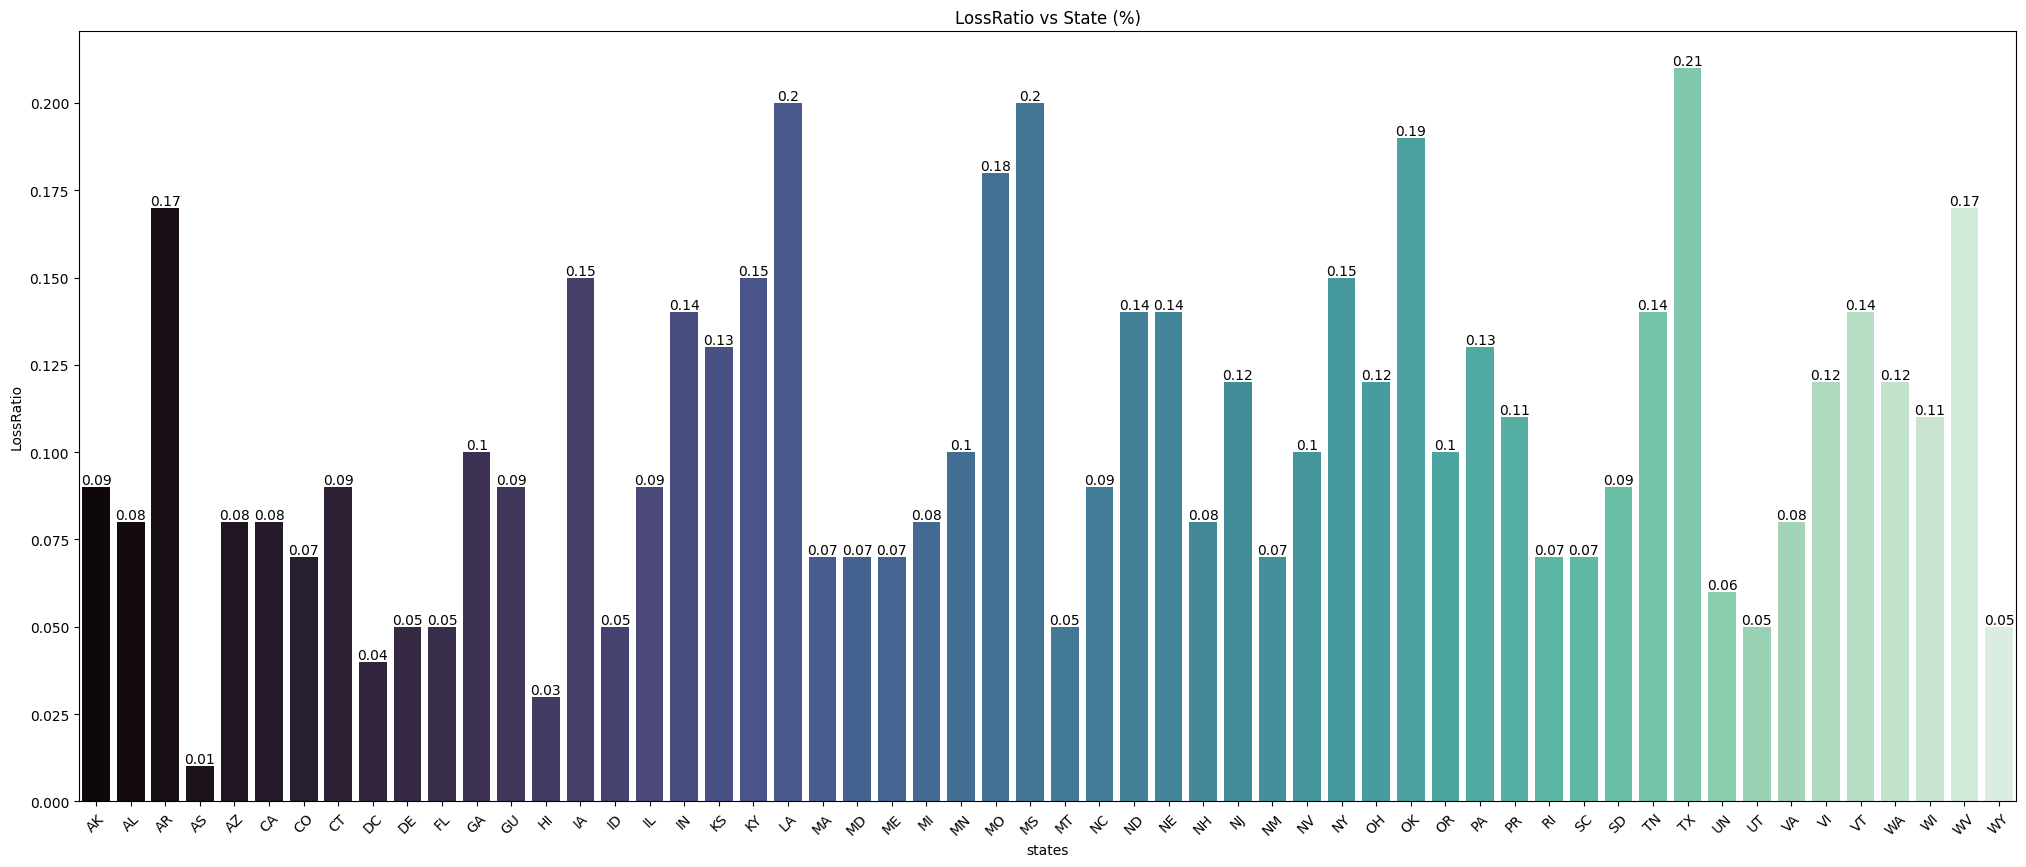

In [42]:
plt.figure(figsize=(25,10))

ax = sns.barplot(x = 'state',
            y = 'lossRatioSate',
            data =new_data_lossRatio_state,palette = "mako" )

for container in ax.containers:
    ax.bar_label(container)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel("LossRatio")
plt.xlabel("states")
plt.title("LossRatio vs State (%)")


 
# Show the plot
plt.show()

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

Assumption(H0): The two columns are NOT related to each other
Result of Chi-Sq Test: The Probability of H0 being True

In [43]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [44]:
CategoricalVariables=['condominiumIndicator', 'postFIRMConstructionIndicator','state','floodzone_code','rateMethod']

# Calling the function
FunctionChisq(inpData=nfip_claims_new,
              TargetVariable='claim_segmentation',
              CategoricalVariablesList= CategoricalVariables)

condominiumIndicator is correlated with claim_segmentation | P-Value: 0.0
postFIRMConstructionIndicator is correlated with claim_segmentation | P-Value: 0.0
state is correlated with claim_segmentation | P-Value: 0.0
floodzone_code is correlated with claim_segmentation | P-Value: 0.0
rateMethod is correlated with claim_segmentation | P-Value: 0.0


['condominiumIndicator',
 'postFIRMConstructionIndicator',
 'state',
 'floodzone_code',
 'rateMethod']

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
ANOVA Test result: Probability of H0 being true

In [45]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inputData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inputData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [46]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['agricultureStructureIndicator', 'baseFloodElevation','policyCount','countyCode','communityRatingSystemDiscount',
                      'elevatedBuildingIndicator', 'houseWorship','latitude','longitude','locationOfContents','lowestFloorElevation','nonProfitIndicator',
                     'obstructionType','postFIRMConstructionIndicator','smallBusinessIndicatorBuilding','yearOfLoss','reportedZipcode','primaryResidence',
                     'totalinsurancecoverage','new_elev_diff','MonthOfLosss','BuildingsConstructionYear']
FunctionAnova(inputData=nfip_claims_new, TargetVariable='claim_segmentation', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

agricultureStructureIndicator is NOT correlated with claim_segmentation | P-Value: 0.8131285967142874
baseFloodElevation is NOT correlated with claim_segmentation | P-Value: 0.29990995791893116
policyCount is correlated with claim_segmentation | P-Value: 7.840079585619711e-124
countyCode is correlated with claim_segmentation | P-Value: 0.0
communityRatingSystemDiscount is correlated with claim_segmentation | P-Value: 9.799479235573042e-253
elevatedBuildingIndicator is correlated with claim_segmentation | P-Value: 0.0
houseWorship is NOT correlated with claim_segmentation | P-Value: 0.6503619546176428
latitude is correlated with claim_segmentation | P-Value: 0.0
longitude is correlated with claim_segmentation | P-Value: 4.680845199369497e-200
locationOfContents is correlated with claim_segmentation | P-Value: 0.0
lowestFloorElevation is correlated with claim_segmentation | P-Value: 0.004660590016934679
nonProfitIndicator is correlated with claim_segmentation 

['policyCount',
 'countyCode',
 'communityRatingSystemDiscount',
 'elevatedBuildingIndicator',
 'latitude',
 'longitude',
 'locationOfContents',
 'lowestFloorElevation',
 'nonProfitIndicator',
 'obstructionType',
 'postFIRMConstructionIndicator',
 'yearOfLoss',
 'reportedZipcode',
 'primaryResidence',
 'totalinsurancecoverage',
 'new_elev_diff',
 'MonthOfLosss',
 'BuildingsConstructionYear']

### I deleted the columns that they are statistically non-significant. Also removed the unrelated columns.

In [ ]:
nfip_claims_new = nfip_claims_new.drop('dateOfLoss', axis=1)

In [150]:
nfip_claims_new = nfip_claims_new.drop('id', axis=1)

In [151]:
nfip_claims_new = nfip_claims_new.drop('originalConstructionDate', axis=1)

In [152]:
nfip_claims_new = nfip_claims_new.drop('floodZone', axis=1)

In [ ]:
nfip_claims_new = nfip_claims_new.drop('reportedCity', axis=1)

In [103]:
#nfip_claims_new.to_csv('nfip_claims_allML.csv') 

In [157]:
nfip_claims_new = nfip_claims_new.drop('baseFloodElevation', axis=1)

In [158]:
nfip_claims_new = nfip_claims_new.drop('communityRatingSystemDiscount', axis=1)

In [159]:
nfip_claims_new = nfip_claims_new.drop('houseWorship', axis=1)

In [160]:
nfip_claims_new = nfip_claims_new.drop('lowestFloorElevation', axis=1)

In [161]:
nfip_claims_new = nfip_claims_new.drop('smallBusinessIndicatorBuilding', axis=1)

In [167]:
nfip_claims_new = nfip_claims_new.drop('agricultureStructureIndicator', axis=1)

In [168]:
nfip_claims_new.columns

Index(['basementEnclosureCrawlspace', 'condominiumIndicator', 'policyCount', 'countyCode', 'elevatedBuildingIndicator', 'elevationCertificateIndicator', 'latitude', 'longitude', 'locationOfContents', 'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator', 'obstructionType', 'occupancyType', 'amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim', 'amountPaidOnIncreasedCostOfComplianceClaim', 'postFIRMConstructionIndicator', 'rateMethod', 'state', 'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage', 'yearOfLoss', 'reportedZipcode', 'primaryResidence', 'totalinsurancecoverage', 'amountPaidonTotalClaim', 'new_elev_diff', 'floodzone_code', 'MonthOfLosss', 'BuildingsConstructionYear', 'LossRatio', 'claim_segmentation'], dtype='object')

In [169]:
print(nfip_claims_new.isnull().sum())

basementEnclosureCrawlspace                   0
condominiumIndicator                          0
policyCount                                   0
countyCode                                    0
elevatedBuildingIndicator                     0
elevationCertificateIndicator                 0
latitude                                      0
longitude                                     0
locationOfContents                            0
numberOfFloorsInTheInsuredBuilding            0
nonProfitIndicator                            0
obstructionType                               0
occupancyType                                 0
amountPaidOnBuildingClaim                     0
amountPaidOnContentsClaim                     0
amountPaidOnIncreasedCostOfComplianceClaim    0
postFIRMConstructionIndicator                 0
rateMethod                                    0
state                                         0
totalBuildingInsuranceCoverage                0
totalContentsInsuranceCoverage          

A new datas set created for ML.

In [170]:
nfip_claims_new.to_csv('nfip_claims_ML.csv') 

#####################################################################